In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve , accuracy_score

In [121]:
df = pd.read_csv('diabetes_dataset__2019.csv')
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [122]:
df['Diabetic'] = df['Diabetic'].drop(df[df['Diabetic'] == ' no'].index, axis=0)


In [123]:
df['Diabetic'].value_counts()

Diabetic
no     684
yes    266
Name: count, dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [125]:
df.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [126]:
df.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             2
dtype: int64

In [127]:
df.shape

(952, 18)

In [128]:
df['Pregancies'] = df['Pregancies'].fillna(df['Pregancies'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].median)

In [129]:
df.dropna(inplace=True)

In [130]:
encode = LabelEncoder()
cols = df.select_dtypes(include=['object']).columns
for col in cols:
    df[col] = encode.fit_transform(df[col].astype(str))



In [131]:
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,1,1,0,1,3,22,0,0,8,6,0,1,2,2,0.0,0,0,0
1,1,1,0,1,0,12,0,0,8,6,2,3,2,4,0.0,0,0,0
2,0,1,0,0,3,8,0,0,6,6,0,1,2,4,0.0,0,0,0
3,1,1,0,0,3,7,0,0,8,6,0,1,2,4,0.0,0,0,0
4,0,1,0,0,0,11,0,0,8,8,0,1,2,4,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,3,1,1,0,1,9,0,0,8,6,0,2,2,4,0.0,0,0,1
948,2,1,1,1,1,11,0,0,6,5,2,1,2,2,0.0,0,1,1
949,2,1,0,1,2,7,0,0,6,5,2,1,2,2,0.0,0,0,0
950,2,1,0,1,0,11,0,1,6,5,2,1,3,2,0.0,0,0,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               949 non-null    int32  
 1   Gender            949 non-null    int32  
 2   Family_Diabetes   949 non-null    int32  
 3   highBP            949 non-null    int32  
 4   PhysicallyActive  949 non-null    int32  
 5   BMI               949 non-null    int32  
 6   Smoking           949 non-null    int32  
 7   Alcohol           949 non-null    int32  
 8   Sleep             949 non-null    int64  
 9   SoundSleep        949 non-null    int64  
 10  RegularMedicine   949 non-null    int32  
 11  JunkFood          949 non-null    int32  
 12  Stress            949 non-null    int32  
 13  BPLevel           949 non-null    int32  
 14  Pregancies        949 non-null    float64
 15  Pdiabetes         949 non-null    int32  
 16  UriationFreq      949 non-null    int32  
 17  Di

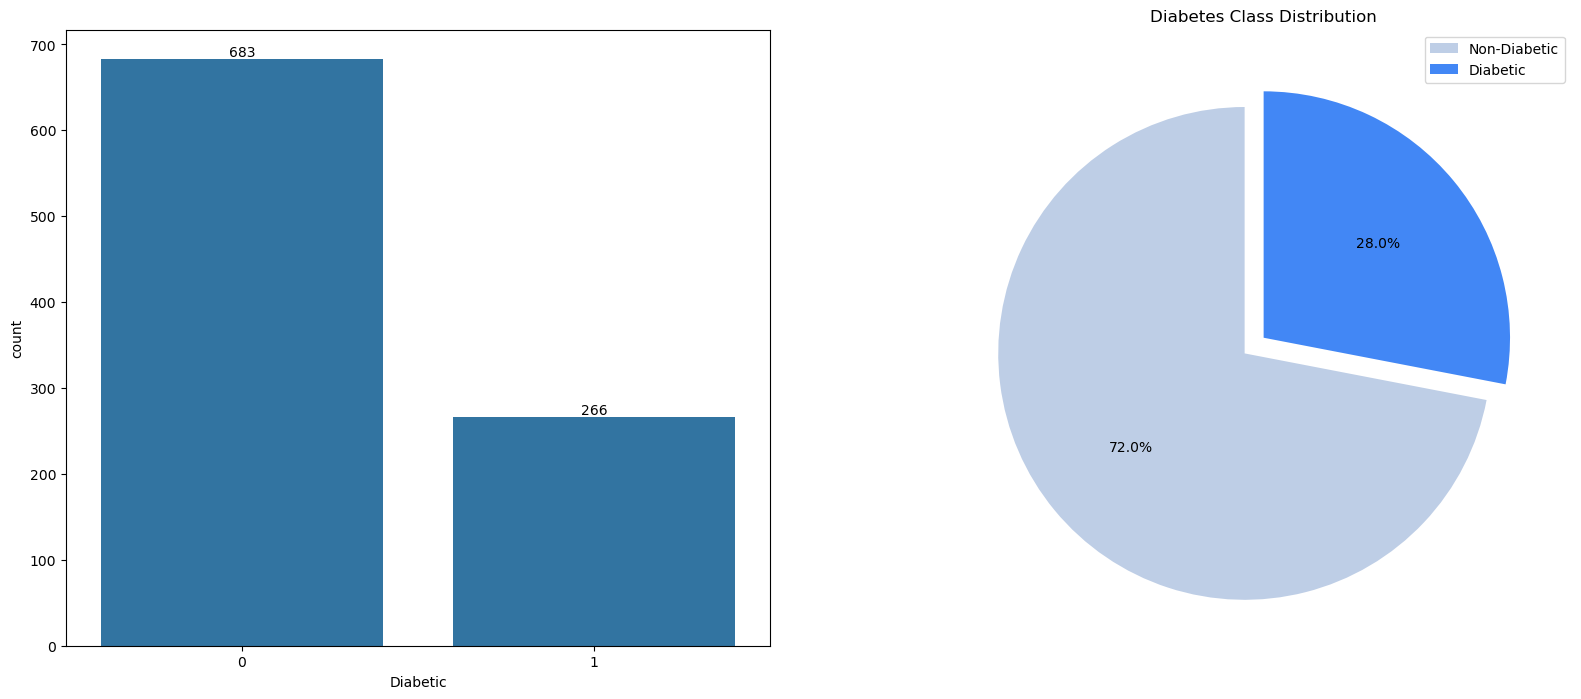

In [133]:
plt.figure(figsize=(20, 8))

# Plotting the countplot
plt.subplot(1, 2, 1)
sns.countplot(x="Diabetic", data=df)

# Function to annotate bars with their heights
def put_numbers_on_bar():
    ax = plt.gca()
    for p in ax.patches:
        height = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{height}', (x, y), ha='center', va='bottom')

put_numbers_on_bar()

# Plotting the pie chart
ax = plt.subplot(1, 2, 2)
label = ['Non-Diabetic', 'Diabetic']

# Ensure values are sorted by class 0 and 1
diabetic_count = list(df['Diabetic'].value_counts().sort_index())
colors_df = ['#becee6', '#4287f5']
explode = (0.1, 0) if len(diabetic_count) == 2 else tuple([0] * len(diabetic_count))  # Dynamic explode

ax.pie(diabetic_count, explode=explode, autopct='%.1f%%',
       shadow=False, startangle=90, colors=colors_df)

plt.legend(label, loc='best')
plt.title("Diabetes Class Distribution")
plt.show()

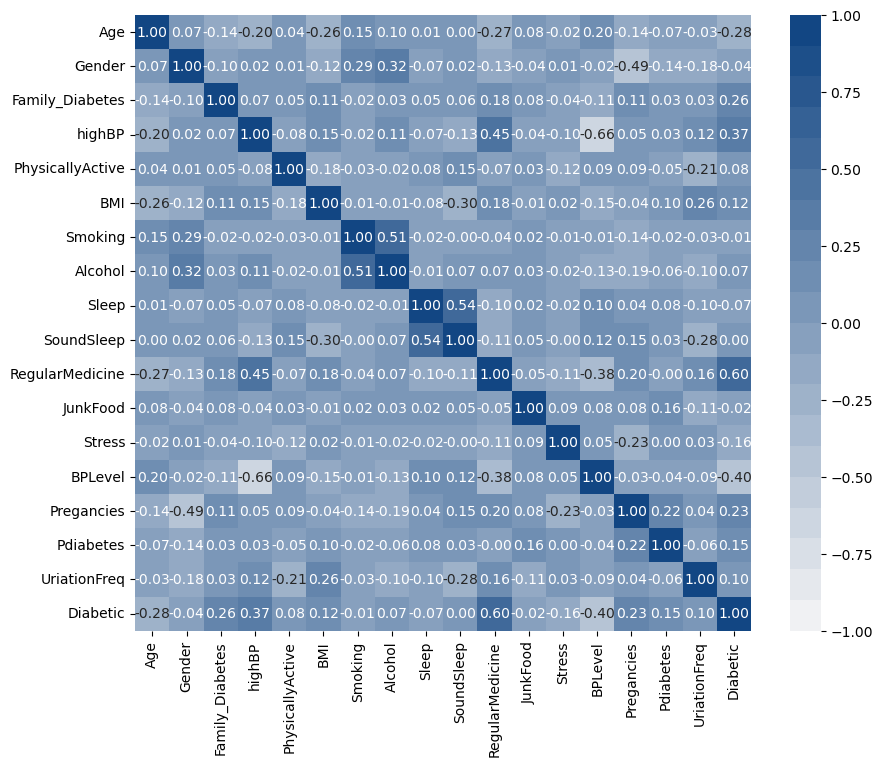

[0.6, 0.54, 0.51, 0.45, 0.37]


In [134]:
import heapq
fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, 
cmap=sns.color_palette("light:#124683", n_colors=20),
vmin=-1.0, vmax=1.0,
square=True, ax=ax,
annot=True, fmt=".2f")
plt.show()
# show the 5 highest_values (excluding 1 and duplicates)
highest_values = [float(item.get_text()) for item in ax.texts]
filtered_highest_values = [val for val in highest_values if val != 1]
unique_highest_values = set(filtered_highest_values)
top_5_highest_values = heapq.nlargest(5, unique_highest_values)

print(top_5_highest_values)

In [137]:
X = df.drop('Diabetic', axis=1)
y = df['Diabetic']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [179]:
# Reapplying Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [180]:
y_pred_log_reg = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log_reg)
# Evaluating the model
print("Logistic Regression Accuracy:", log_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       144
           1       0.79      0.80      0.80        46

    accuracy                           0.90       190
   macro avg       0.86      0.87      0.86       190
weighted avg       0.90      0.90      0.90       190



In [181]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [182]:
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:",svm_accuracy)

SVM Accuracy: 0.9052631578947369


In [183]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [184]:
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9052631578947369


In [185]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [186]:
y_pred_RF = RF.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_RF)
print("Random Forest Accuracy:",rf_accuracy)

Random Forest Accuracy: 0.9631578947368421


In [187]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [202]:
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9789473684210527


In [189]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [190]:
y_pred_nb = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8052631578947368


In [191]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [192]:
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:",xgb_accuracy)

XGBoost Accuracy: 0.968421052631579


In [193]:

# Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:\n", cm_log_reg)

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_RF)
print("\nConfusion Matrix for Random Forest:\n", cm_rf)

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix for Decision Tree:\n", cm_dt)

# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for SVM:\n", cm_svm)

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix for KNN:\n", cm_knn)

# Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix for Naive Bayes:\n", cm_nb)

# XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix for XGBoost:\n", cm_xgb)

Confusion Matrix for Logistic Regression:
 [[134  10]
 [  9  37]]

Confusion Matrix for Random Forest:
 [[139   5]
 [  2  44]]

Confusion Matrix for Decision Tree:
 [[142   2]
 [  2  44]]

Confusion Matrix for SVM:
 [[137   7]
 [ 11  35]]

Confusion Matrix for KNN:
 [[138   6]
 [ 12  34]]

Confusion Matrix for Naive Bayes:
 [[127  17]
 [ 20  26]]

Confusion Matrix for XGBoost:
 [[141   3]
 [  3  43]]


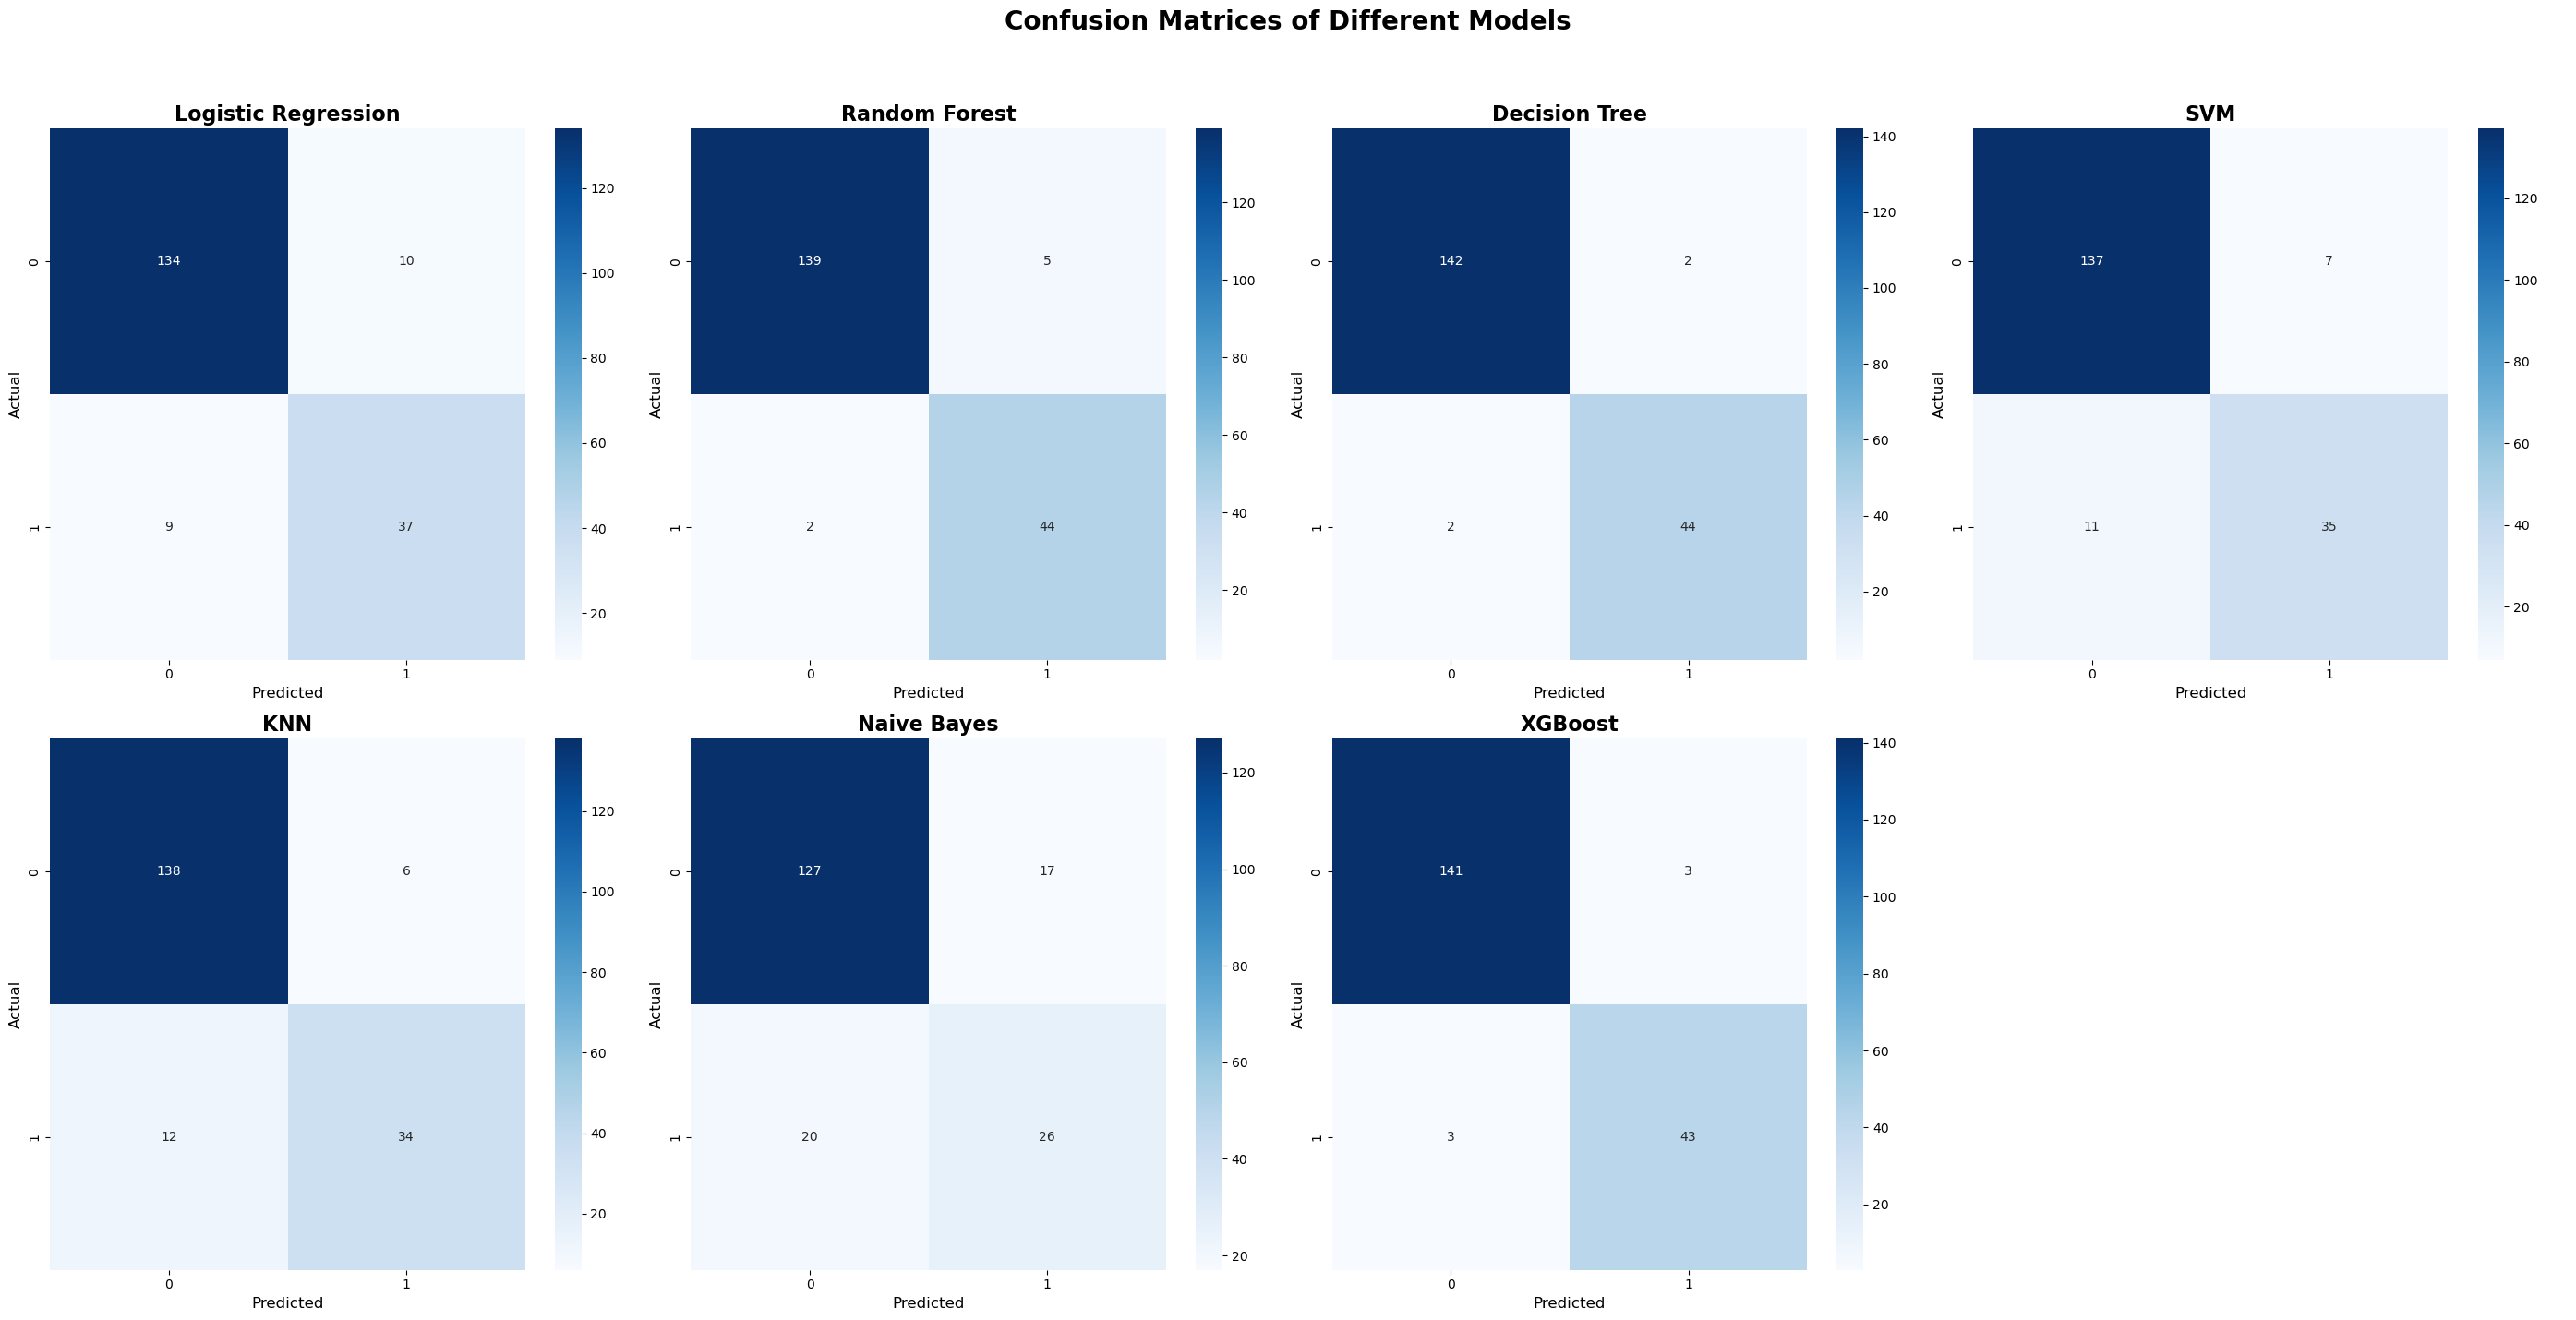

In [194]:
fig, axes = plt.subplots(2, 4, figsize=(28, 15))

# List of confusion matrices and their corresponding titles
confusion_matrices = [
    (cm_log_reg, "Logistic Regression"),
    (cm_rf, "Random Forest"),
    (cm_dt, "Decision Tree"),
    (cm_svm, "SVM"),
    (cm_knn, "KNN"),
    (cm_nb, "Naive Bayes"),
    (cm_xgb, "XGBoost")
]

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot each confusion matrix
for i, (cm, title) in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(title, fontsize=16, fontweight='bold')
    axes[i].set_xlabel("Predicted", fontsize=12)
    axes[i].set_ylabel("Actual", fontsize=12)

# Hide the last subplot if there are fewer than 8 models
if len(confusion_matrices) < len(axes):
    axes[len(confusion_matrices)].axis("off")
plt.suptitle("Confusion Matrices of Different Models", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [210]:
All_Test_Accuracy = [(log_accuracy, svm_accuracy, rf_accuracy, dt_accuracy, knn_accuracy, nb_accuracy, xgb_accuracy)]

rf_score = pd.DataFrame(data = All_Test_Accuracy, columns=['Logistic Regression','SVM','Random Forest','Decision Tree','KNN ','Naive Bayes','XGBoost'])
rf_score.insert(0, 'Accuracy Score', 'output')
rf_score

,Accuracy Score,Logistic Regression,SVM,Random Forest,Decision Tree,KNN,Naive Bayes,XGBoost
0,output,0.9,0.905263,0.963158,0.978947,0.905263,0.805263,0.968421


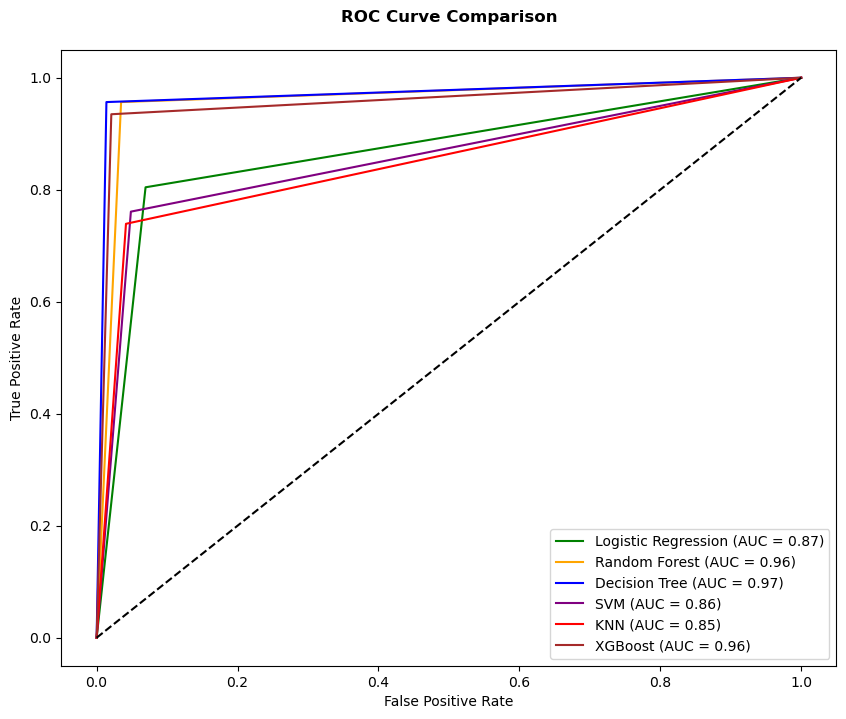

In [197]:
# Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_log_reg)
lr_auc = roc_auc_score(y_test, y_pred_log_reg)

# Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_RF)
rf_auc = roc_auc_score(y_test, y_pred_RF)

# Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_pred_dt)

# SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_svm)

# KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_pred_knn)

# XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})", color="green")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color="orange")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})", color="blue")
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_auc:.2f})", color="purple")
plt.plot(knn_fpr, knn_tpr, label=f"KNN (AUC = {knn_auc:.2f})", color="red")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.2f})", color="brown")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison", pad=20, fontweight="bold")
plt.legend()
plt.show()